In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./Source Files/monsters.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,proficiencies,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,languages,challenge_rating,special_abilities,actions,legendary_actions,url,reactions,other_speeds
0,0,5f2329ad0b1bb138c59411ee,aboleth,Aboleth,Large,aberration,NaN,lawful evil,17,135,18d10,"{'walk': '10 ft.', 'swim': '40 ft.'}",21,9,15,18,15,18,"[{'name': 'Saving Throw: CON', 'url': '/api/pr...",[],[],[],[],"{'darkvision': '120 ft.', 'passive_perception'...","Deep Speech, telepathy 120 ft.",10.00,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'desc': 'The aboleth ...","[{'name': 'Detect', 'desc': 'The aboleth makes...",/api/monsters/aboleth,NaN,NaN
1,1,5f2329ad0b1bb138c59411ef,acolyte,Acolyte,Medium,humanoid,any race,any alignment,10,9,2d8,{'walk': '30 ft.'},10,10,10,10,14,11,"[{'name': 'Skill: Medicine', 'url': '/api/prof...",[],[],[],[],{'passive_perception': 12},any one language (usually Common),0.25,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",NaN,/api/monsters/acolyte,NaN,NaN
2,2,5f2329ad0b1bb138c59411f1,adult-black-dragon,Adult Black Dragon,Huge,dragon,NaN,chaotic evil,19,195,17d12,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",23,14,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['acid'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",14.00,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-black-dragon,NaN,NaN
3,3,5f2329ad0b1bb138c59411f0,adult-blue-dragon,Adult Blue Dragon,Huge,dragon,NaN,lawful evil,19,225,18d12,"{'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...",25,10,23,16,15,19,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['lightning'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",16.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-blue-dragon,NaN,NaN
4,4,5f2329ad0b1bb138c59411f2,adult-brass-dragon,Adult Brass Dragon,Huge,dragon,NaN,chaotic good,18,172,15d12,"{'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...",23,10,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['fire'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",13.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...",NaN,/api/monsters/adult-brass-dragon,NaN,NaN


In [6]:
df.shape

(322, 32)

In [10]:
df.columns

Index(['Unnamed: 0', '_id', 'index', 'name', 'size', 'type', 'subtype',
       'alignment', 'armor_class', 'hit_points', 'hit_dice', 'speed',
       'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom',
       'charisma', 'proficiencies', 'damage_vulnerabilities',
       'damage_resistances', 'damage_immunities', 'condition_immunities',
       'senses', 'languages', 'challenge_rating', 'special_abilities',
       'actions', 'legendary_actions', 'url', 'reactions', 'other_speeds'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              322 non-null    int64  
 1   _id                     322 non-null    object 
 2   index                   322 non-null    object 
 3   name                    322 non-null    object 
 4   size                    322 non-null    object 
 5   type                    322 non-null    object 
 6   subtype                 64 non-null     object 
 7   alignment               322 non-null    object 
 8   armor_class             322 non-null    int64  
 9   hit_points              322 non-null    int64  
 10  hit_dice                322 non-null    object 
 11  speed                   322 non-null    object 
 12  strength                322 non-null    int64  
 13  dexterity               322 non-null    int64  
 14  constitution            322 non-null    in

Text(0.5, 1.0, 'CR (Challenge Rating) Overall Counts')

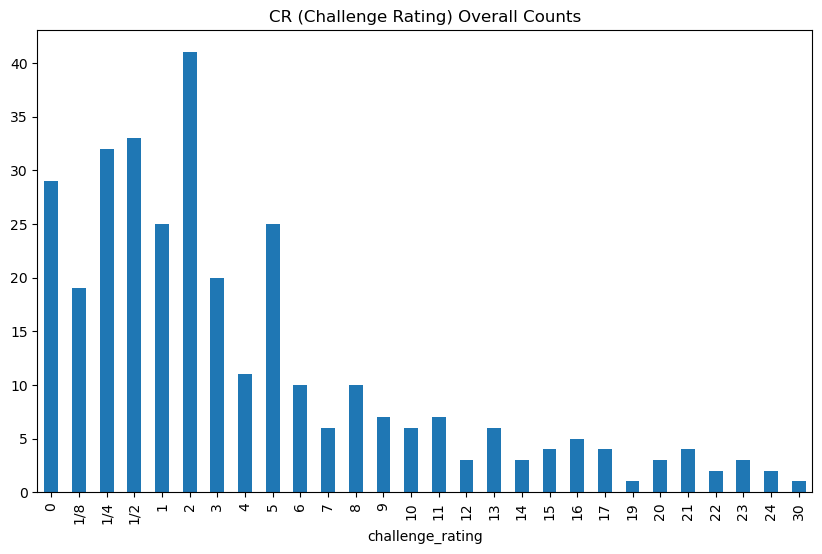

In [20]:
data = df['challenge_rating']
data = data.sort_values()
data = data.astype(str)
data = data.str.replace('0.5', '1/2')
data = data.str.replace('0.25', '1/4')
data = data.str.replace('0.125', '1/8')
data = data.str.replace('.0', '')

plt.figure(figsize=(10,6))
data.value_counts()[data.unique()].plot(kind='bar')
plt.title("CR (Challenge Rating) Overall Counts")

Text(0.5, 1.0, 'Monster size distribution')

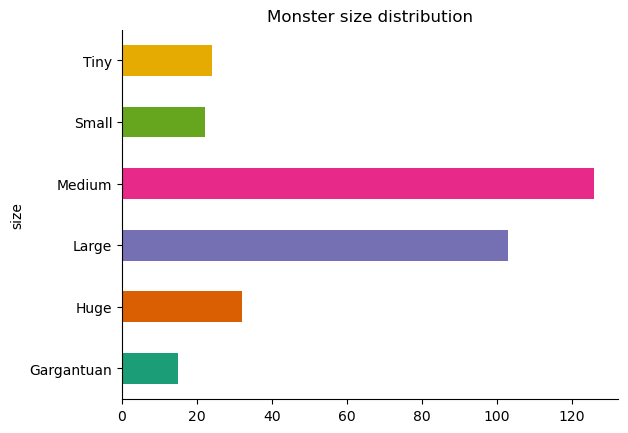

In [24]:
df.groupby('size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Monster size distribution")

Text(0.5, 1.0, 'Average HP per type')

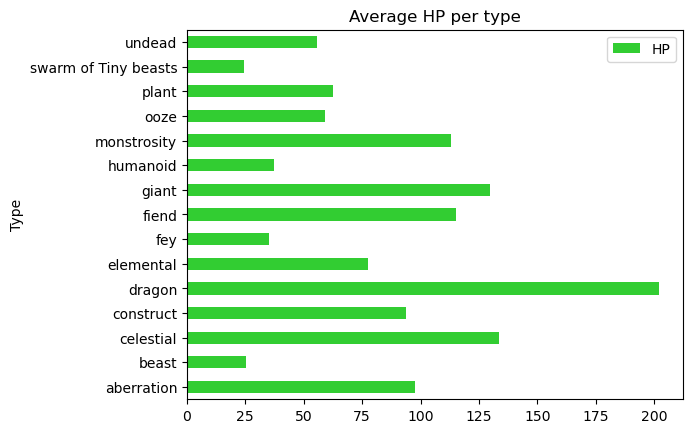

In [25]:
hp = df['hit_points']
monster_type = df['type']
type_hp = pd.DataFrame({'HP': hp, 'Type': monster_type})
mean_type_hp = type_hp.groupby(['Type']).mean()

mean_type_hp.plot(kind='barh', color='limegreen')
plt.title('Average HP per type')